(<Axes: title={'center': 'Scharr'}>,
 Text(0.5, 1.0, 'Scharr'),
 (np.float64(-0.5), np.float64(242.5), np.float64(181.5), np.float64(-0.5)))

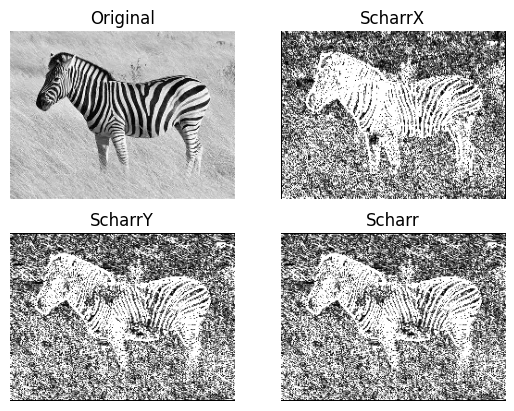

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('zebra.webp',0)

scharrX = cv2.Scharr(img,cv2.CV_64F,1,0)
scharrY = cv2.Scharr(img,cv2.CV_64F,0,1)

scharrX = cv2.convertScaleAbs(scharrX)
scharrY = cv2.convertScaleAbs(scharrY)

scharr = cv2.addWeighted(scharrX,0,scharrY,0.9,0)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray'),plt.title("Original"),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(scharrX,cmap='gray'),plt.title("ScharrX"),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(scharrY,cmap='gray'),plt.title("ScharrY"),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(scharr,cmap='gray'),plt.title("Scharr"),plt.axis('off')

(<Axes: title={'center': 'Smooth image'}>,
 Text(0.5, 1.0, 'Smooth image'),
 (np.float64(-0.5), np.float64(252.5), np.float64(188.5), np.float64(-0.5)))

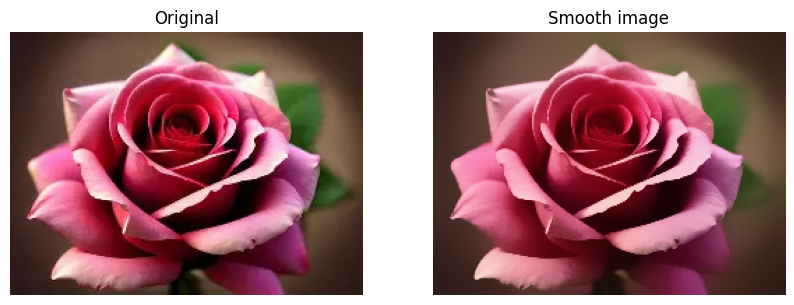

In [5]:
img = cv2.imread("rose.webp")

bilateral = cv2.bilateralFilter(img,0,sigmaColor=75,sigmaSpace=15)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title("Original"),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(bilateral,cv2.COLOR_BGR2RGB)),plt.title("Smooth image"),plt.axis('off')

(<Axes: title={'center': 'Unsharp Image'}>,
 Text(0.5, 1.0, 'Unsharp Image'),
 (np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5)))

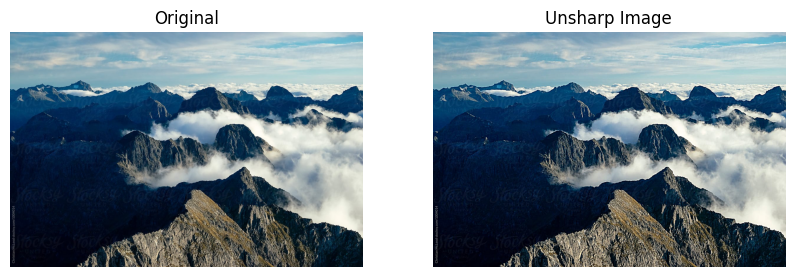

In [19]:
img = cv2.imread("mountain.jpg")

gaussian = cv2.GaussianBlur(img,(9,9),10)

unsharp = cv2.addWeighted(img,1.5,gaussian,-0.5,0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title("Original"),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(unsharp,cv2.COLOR_BGR2RGB)),plt.title("Unsharp Image"),plt.axis('off')

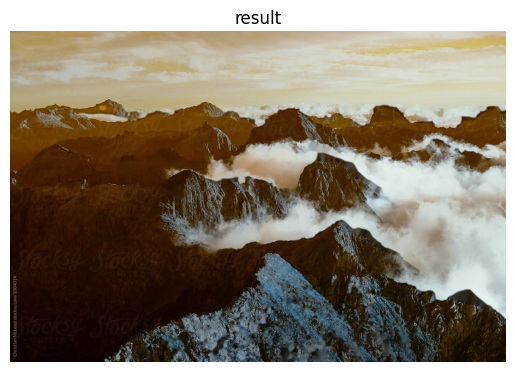

In [20]:
img = cv2.imread('mountain.jpg')

# Convert to grayscale (watermark is mostly light)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Increase contrast to highlight watermark areas
# You can try histogram equalization or CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
contrast = clahe.apply(gray)

# Threshold - tune this threshold for your image
_, mask = cv2.threshold(contrast, 220, 255, cv2.THRESH_BINARY)

# Optional: Morphological operations to clean the mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.dilate(mask, kernel, iterations=1)

result = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

plt.imshow(result),plt.title("result"),plt.axis('off')
plt.savefig("without_watermark.jpg")